In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Semana 7. Clase 12: Ejercicios de transformada de Fourier</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

### Calcular la transformada de Fourier:

> + Consideremos una secuencia shifteada en el tiempo:
$$
	\begin{align*}
		x[n-n_{0}] 
	\end{align*}
$$
> + Calculemos su transformada de Fourier.

### Demostración: 

> + En efecto, sea $X(e^{j\omega})$ la transformada de Fourier de $x[n].$ Entonces,
$$
    \begin{align*}
		\mathscr{F}\left\{x[n-n_{0}]\right\} &= \sum_{n=-\infty}^{\infty} x[n-n_{0}]\,e^{-j\omega n}\\
	\end{align*}
$$
> + Cambio de variables: Sea $k=n-n_{0}$ tal que:
$$
	 \begin{align*}
		\mathscr{F}\left\{x[n-n_{0}]\right\} &= \sum_{k=-\infty}^{\infty} x[k]\,e^{-j\omega (k+n_{0})}\\
		& = e^{-j\omega n_{0}} \Bigg(  \sum_{k=-\infty}^{\infty} x[k]\,e^{-j\omega k} \Bigg)\\
		& = e^{-j\omega n_{0}}\,X(e^{j\omega})
	\end{align*}
$$
$$
\begin{align}
		x[n-n_{0}] & \overset{\mathscr{F}}{\longleftrightarrow} e^{-j\omega n_{0}}\,X(e^{j\omega})
	\label{Prop1}
	\end{align}
$$

### Calcular la transformada de Fourier

> + Sea $x[n] = a^{n}\,u[n].$ Calculemos la transformada de Fourier de esta señal.

> + Consideremos:
$$	
\begin{align*}
	X(e^{j\omega}) &=\mathscr{F}\left\{x[n]\right\}\\
		 & = \sum_{n=0}^{\infty} a^{n}\,e^{-j\omega n}\\
		 & = \sum_{n=0}^{\infty} \bigg( a\,e^{-j\omega}\bigg)^{n}\\
		 & = \frac{1}{1- a\,e^{-j\omega}},\,\,\,\,\, \text{si} \left| a\,e^{-j\omega}\right|<1, \text{o bien,} \left| a\right|<1
\end{align*}
$$  
> + Observación: Sumabilidad absoluta es una condición suficiente para la existencia de una transformada de Fourier.
> + En Python, evaluar $X(e^{j\omega})$ en 512 puntos espaciados entre $-\pi \leq \omega \leq \pi$ y graficar el espectro de magnitud $|X(e^{j\omega})|$ versus frecuencia; la parte real versus frecuencia; la parte imaginaria versus frecuencia; y la parte real versus la parte imaginaria.


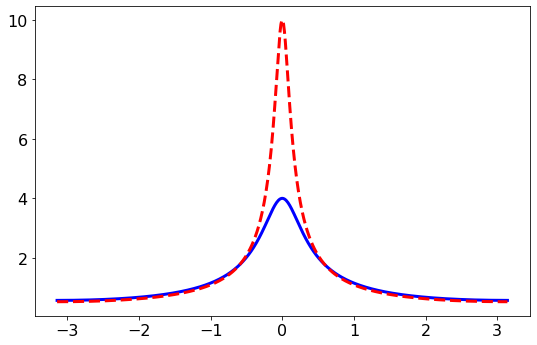

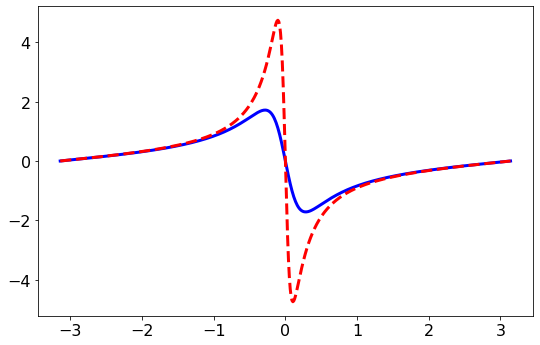

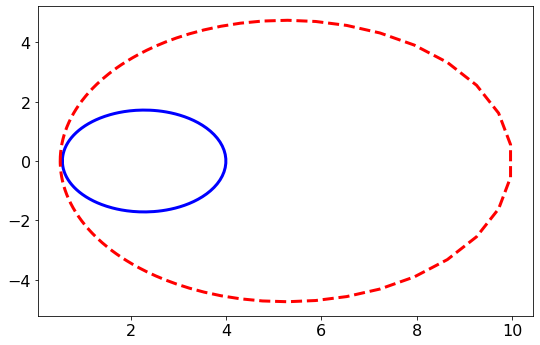

In [2]:
import numpy as np
from matplotlib import pyplot as plt

a1 = 0.75
a2 = 0.9
w = np.linspace(-np.pi,np.pi,512)
X1 = 1/(1-a1*np.exp(-1j*w))
X2 = 1/(1-a2*np.exp(-1j*w))
fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(w,np.abs(X1),'b',linewidth = 3.0)
ax.plot(w,np.abs(X2),'r',linestyle='--', linewidth = 3.0)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(w,X1.imag,'b',linewidth = 3.0)
ax.plot(w,X2.imag,'r',linestyle='--', linewidth = 3.0)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(X1.real,X1.imag,'b',linewidth = 3.0)
ax.plot(X2.real,X2.imag,'r',linestyle='--', linewidth = 3.0)


### Teorema de convolución

> + Este teorema es fundamental en procesamiento digital de señales. 
> + Este, establece que la convolución en el dominio del tiempo es equivalente a la multiplicación de los espectros en el dominio de la frecuencia. 
> + Consideremos una secuencia de entrada $x[n]$ a un sistema LTI con respuesta impulso $h[n]$. Entonces, la transformada de Fourier de la salida $y[n]$, se puede obtener al multiplicar el espectro de la entrada $X(e^{j\omega})$ con la función de respuesta de frecuencia del sistema $|H(e^{j\omega})|$.

> + Si 
$$
\begin{align*}
		X(e^{j\omega}) &=\mathscr{F}\left\{x[n]\right\}	
\end{align*}
$$
> + y
$$
    \begin{align*}
		H(e^{j\omega}) &=\mathscr{F}\left\{h[n]\right\}	
	\end{align*}
$$
> + Y si además,
$$
\begin{align*}
		y[n] & = \sum_{k=-\infty}^{\infty} x[k]\,h[n-k] = x[n]*h[n]
\end{align*}
$$
> + Entonces,
$$
\begin{align}
		Y(e^{j\omega}) & = X(e^{j\omega})\cdot H(e^{j\omega})	
\end{align}
$$

### Demostración:

> + En efecto,
$$
\begin{align*}
		Y(e^{j\omega}) & = \sum_{n=-\infty}^{\infty} y[n]\,e^{-j\omega n}\\
		                        & = \sum_{n=-\infty}^{\infty} \Bigg(\sum_{k=-\infty}^{\infty} x[k]\,h[n-k]\Bigg)\,e^{-j\omega n}
\end{align*}
$$
$$
\begin{align}
		Y(e^{j\omega}) & = \sum_{k=-\infty}^{\infty} x[k]\,\Bigg(\sum_{n=-\infty}^{\infty} h[n-k]\,e^{-j\omega n}\Bigg)
	\label{Prop2}
	\end{align}
$$
> + Pero, usando el resultado de la Ec. (1),
$$
\begin{align*}
    \mathscr{F}\left\{h[n-k] \right\} &=  e^{-j\omega k}\,H(e^{j\omega})
\end{align*}
$$
> + Entonces, reemplazamos en la Ec. (\ref{Prop2}), y obtenemos:
$$
\begin{align*}
		Y(e^{j\omega}) & = \sum_{k=-\infty}^{\infty} x[k]\,\Bigg(e^{-j\omega k}\,H(e^{j\omega})\Bigg)\\
	                                 & = \bigg(\sum_{k=-\infty}^{\infty} x[k]\,e^{-j\omega k}\bigg)\,H(e^{j\omega})
\end{align*}
$$    
$$
\begin{align}
		Y(e^{j\omega}) & = X(e^{j\omega})\cdot H(e^{j\omega})
	\label{Prop3}
	\end{align}
$$

### Ilustración de las propiedades de simetría de la transformada de Fourier
> + Algebra usando la relación de Euler con la que podemos expresar la magnitud y la fase del espectro:
$$
\begin{align*}
X(e^{j\omega}) & = \frac{1}{1-a\cdot e^{-j\omega}} \\
& = \frac{1}{1-a\cdot ({\text{cos}}\,\omega - j\,{\text{sin}}\,\omega)}\\
                               & = \frac{1}{1-a\cdot {\text{cos}}\,\omega + j\,a\,{\text{sin}}\,\omega}\,\cdot\,\frac{1-a\cdot {\text{cos}}\,\omega - j\,a\,{\text{sin}}\,\omega}{1-a\cdot {\text{cos}}\,\omega - j\,a\,{\text{sin}}\,\omega}\\
                               & = \frac{1-a\,{\text{cos}}\,\omega}{(1-a\,{\text{cos}}\,\omega)^{2}+a^{2}{\text{sin}}^{2}\,\omega} \,-\, j\,\frac{a\,{\text{sin}\,\omega}}{(1-a\,{\text{cos}}\,\omega)^{2}+a^{2}{\text{sin}}^{2}\,\omega}
\end{align*}
$$

> + Separando las partes Real e Imaginaria:
$$
\begin{align*}
{\text{Real}}\{X\} & = \frac{1-a\,{\text{cos}}\,\omega}{(1-a\,{\text{cos}}\,\omega)^{2}+a^{2}{\text{sin}}^{2}\,\omega}
\end{align*}
$$

$$
\begin{align*}
{\text{Imag}}\{X\} & = -\,\frac{a\,{\text{sin}\,\omega}}{(1-a\,{\text{cos}}\,\omega)^{2}+a^{2}{\text{sin}}^{2}\,\omega}
\end{align*}
$$

> + Espectro de magnitud:
$$
\begin{align*}
\left|X(e^{j\omega})\right|&= \sqrt{X(e^{j\omega})\cdot X^{*}(e^{j\omega})}\\
                           &= \frac{1}{\sqrt{1-2a{\text{cos}\,\omega}+a^{2}}}
\end{align*}
$$

> + Propiedad: La parte real es par:
$$
\begin{align*}
X_{REAL}(e^{j\omega})&=X_{REAL}(e^{-j\omega})
\end{align*}
$$

> + Propiedad: La parte imaginaria es impar:
$$
\begin{align*}
X_{IMAG}(e^{j\omega})&=-X_{IMAG}(e^{-j\omega})
\end{align*}
$$

> + Propiedad: La magnitud es par:
$$
\begin{align*}
\left|X(e^{j\omega})\right| &=\left|X(e^{-j\omega})\right|
\end{align*}
$$

> + Propiedad: La fase es impar:
$$
\begin{align*}
{\large \sphericalangle} X(e^{j\omega}) &=-{\large{\sphericalangle}} X(e^{-j\omega})
\end{align*}
$$

> + Claramente, se puede observar la naturaleza periódica de los espectros de las señales.

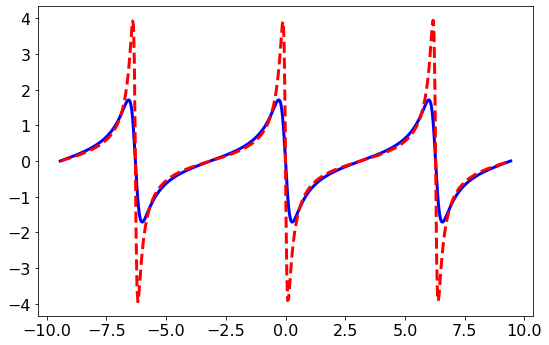

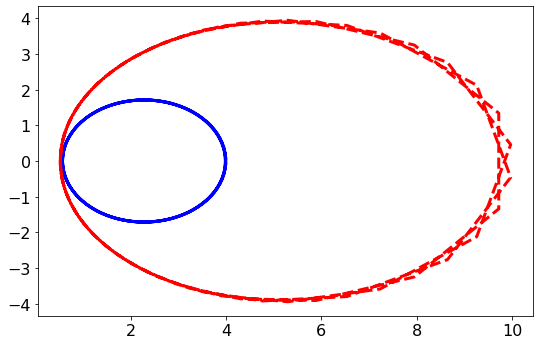

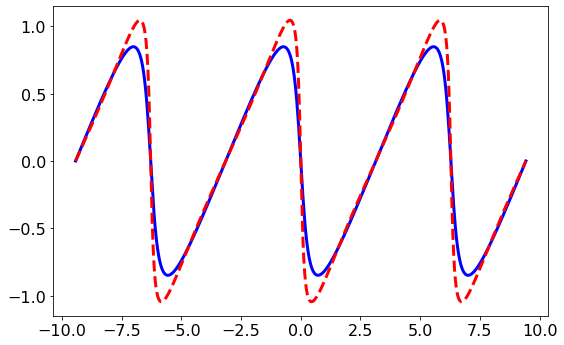

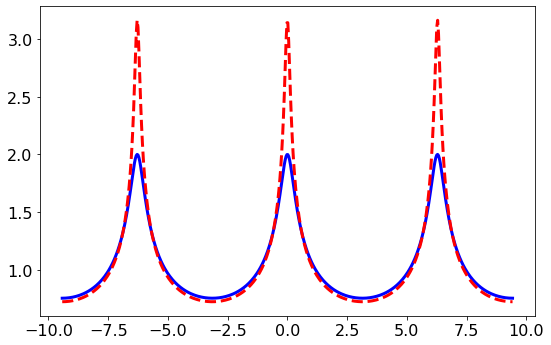

In [3]:
import numpy as np
from matplotlib import pyplot as plt

a1 = 0.75
a2 = 0.9
w = np.linspace(-3*np.pi,3*np.pi,512)

realX1 = (1-a1*np.cos(w))/(1-2*a1*np.cos(w)+a1**2)
realX2 = (1-a2*np.cos(w))/(1-2*a2*np.cos(w)+a2**2)

imagX1 = -a1*np.sin(w)/(1-2*a1*np.cos(w)+a1**2)
imagX2 = -a1*np.sin(w)/(1-2*a2*np.cos(w)+a2**2)

magX1  = 1/np.sqrt(1-2*a1*np.cos(w)+a1**2)
magX2  = 1/np.sqrt(1-2*a2*np.cos(w)+a2**2)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(w,imagX1,'b',linewidth = 3.0)
ax.plot(w,imagX2,'r',linestyle='--', linewidth = 3.0)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(realX1,imagX1,'b',linewidth = 3.0)
ax.plot(realX2,imagX2,'r',linestyle='--', linewidth = 3.0)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(w,np.arctan(imagX1/realX1),'b',linewidth = 3.0)
ax.plot(w,np.arctan(imagX2/realX2),'r',linestyle='--', linewidth = 3.0)

fig = plt.figure(figsize=(8, 5))
ax = plt.gca()
plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
plt.setp(ax.get_ymajorticklabels(), fontsize = 16)
plt.setp(ax.get_xmajorticklabels(), fontsize = 16)
ax.plot(w,np.sqrt(magX1),'b',linewidth = 3.0)
ax.plot(w,np.sqrt(magX2),'r',linestyle='--', linewidth = 3.0)

### Calcular la transformada de Fourier:

> + $x[n] = (\frac{1}{4})^{n}\,u[n]$

> + $x[n] = u[n]-u[n-4]$

> + $x[n] = (\frac{1}{4})^{n+2}\,u[n+2] $
